In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Data_EQTL.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Labels_EQTL.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (2000, 24353)
shape of labels: (24353, 1)


In [3]:
X = X.T
print("shape of data now:", X.shape)
Y = Y['x']
print("shape of labels now:", Y.shape)

shape of data now: (24353, 2000)
shape of labels now: (24353,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(24353, 10)
shape of train set:  (19482, 2000)  and labels:  (19482, 10) 

shape of test set:  (4871, 2000)  and labels:  (4871, 10) 

Shape of train and validation set to check for overfitting
shape of train set:  (17533, 2000)  and labels:  (17533, 10) 

shape of validation set:  (1949, 2000)  and labels:  (1949, 10)


## Linear SVM Performance

shape of labels in training set:  (19482,)
shape of labels in test set:  (4871,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 65.24290800094604
Predict time: 0.08863210678100586
Accuracy of test set:  0.9215766783001437
F1-score of test set:  0.9208872691348662
Precision of test set: 0.9207228856646006
Recall of test set: 0.9215766783001437
Classification report of test set:
                              precision    recall  f1-score   support

              B cell - eQTL       0.99      0.99      0.99       163
      CD14+ Monocyte - eQTL       0.96      0.97      0.96       416
      CD16+ Monocyte - eQTL       0.96      0.93      0.94        55
         CD4+ T cell - eQTL       0.94      0.96      0.95      2705
CD56+ bright NK cell - eQTL       0.82      0.75      0.78        71
   CD56+ dim NK cell - eQTL       0.86      0.88      0.87       483
         CD8+ T cell - eQTL       0.85      0.80      0.82       839
       Megakaryocyte - eQTL       0.83      0.71      0.77        28
                 mDC - eQTL       0.99      0.98      0.98        91
                 pDC - eQTL       0.74   

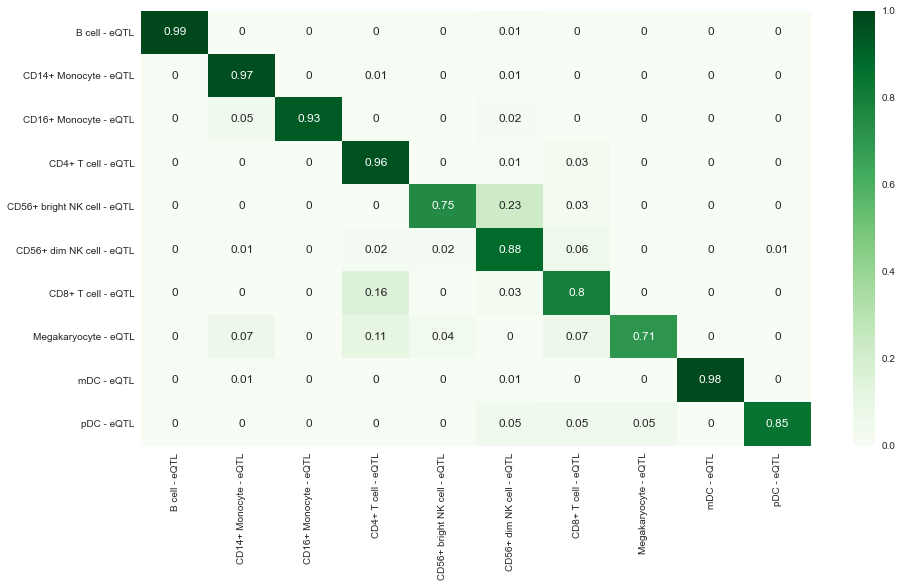

In [5]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


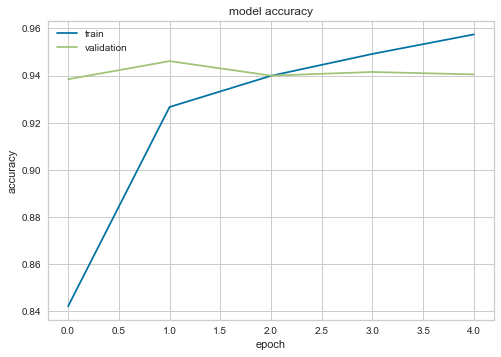

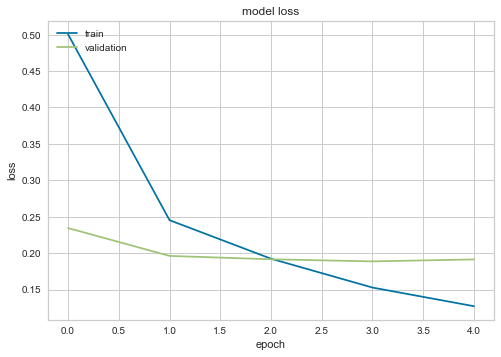

train the final model
Epoch 1/5
609/609 [==============================] - 5s 8ms/step - loss: 0.1045 - accuracy: 0.9657
Epoch 2/5
609/609 [==============================] - 4s 7ms/step - loss: 0.0878 - accuracy: 0.9713
Epoch 3/5
609/609 [==============================] - 5s 7ms/step - loss: 0.0662 - accuracy: 0.9777
Epoch 4/5
609/609 [==============================] - 5s 8ms/step - loss: 0.0469 - accuracy: 0.9850
Epoch 5/5
609/609 [==============================] - 4s 7ms/step - loss: 0.0367 - accuracy: 0.9889
Training time: 23.70691990852356
Predict time: 0.5978107452392578
The results are as follows:
Accuracy of test set:  0.9388215972079655
F1-score of test set:  0.9380679241493736
Precision of test set: 0.9384020981892867
Recall of test set: 0.9388215972079655
Classification report of test set:
                              precision    recall  f1-score   support

              B cell - eQTL       0.99      1.00      0.99       163
      CD14+ Monocyte - eQTL       0.96      1.00 

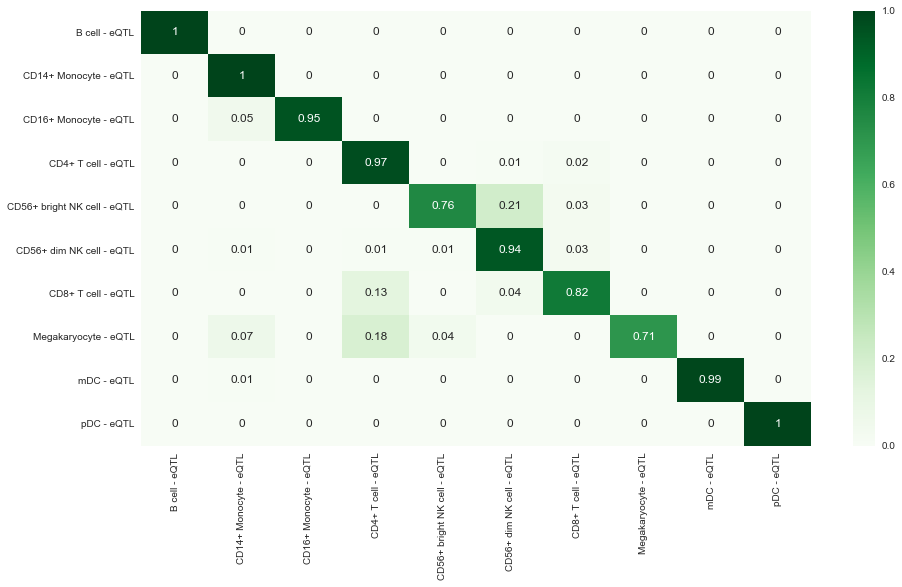

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


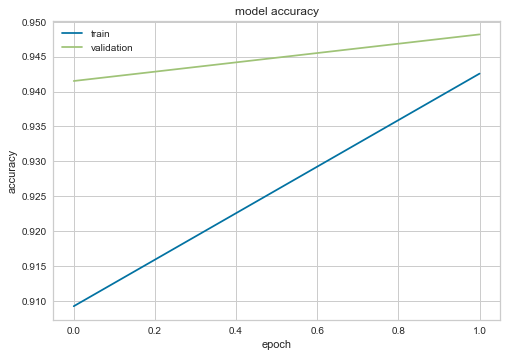

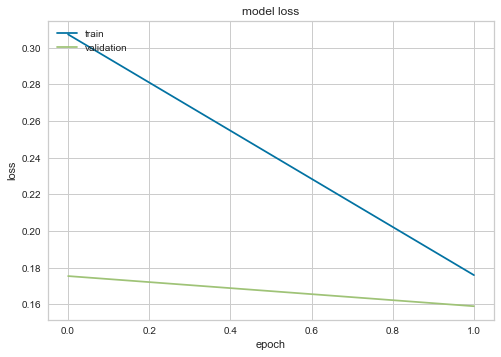

train the final model
Epoch 1/2
609/609 [==============================] - 111s 182ms/step - loss: 0.1262 - accuracy: 0.9594
Epoch 2/2
609/609 [==============================] - 111s 183ms/step - loss: 0.1080 - accuracy: 0.9647
Training time: 224.31029725074768
Predict time: 4.486280918121338
The results are as follows:
Accuracy of test set:  0.9421063436665983
F1-score of test set:  0.9409331314241061
Precision of test set: 0.9417758373736327
Recall of test set: 0.9421063436665983
Classification report of test set:
                              precision    recall  f1-score   support

              B cell - eQTL       0.99      1.00      0.99       163
      CD14+ Monocyte - eQTL       0.95      1.00      0.97       416
      CD16+ Monocyte - eQTL       0.98      0.95      0.96        55
         CD4+ T cell - eQTL       0.95      0.98      0.96      2705
CD56+ bright NK cell - eQTL       0.80      0.86      0.83        71
   CD56+ dim NK cell - eQTL       0.91      0.92      0.92    

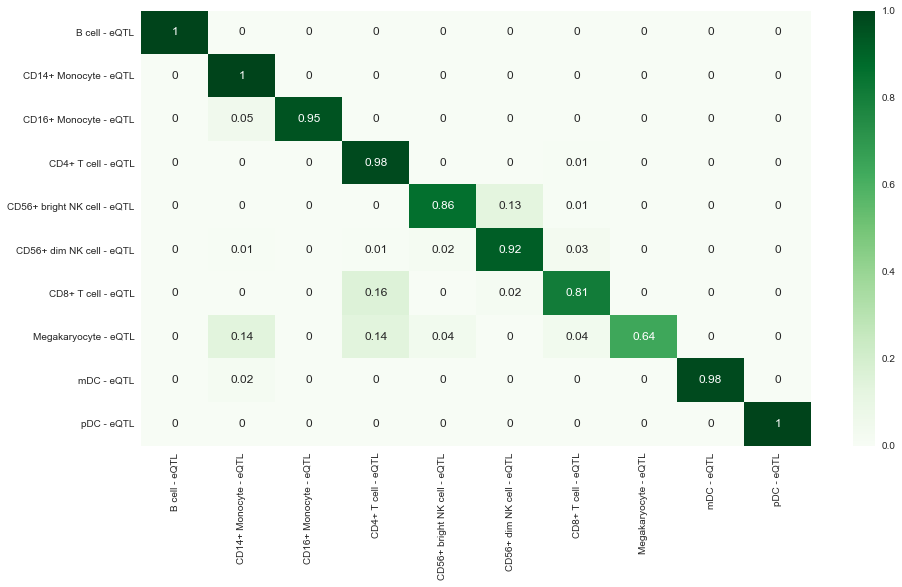

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)